In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [247]:
df=pd.read_csv('Mall Dataset.csv')

***Basic Data Exploration***

In [248]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [249]:
df.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
33,34,Male,18,33,92
101,102,Female,49,62,48
137,138,Male,32,73,73
42,43,Male,48,39,36
157,158,Female,30,78,78


In [250]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [251]:
df.duplicated().any()

False

***checking target (Spending Score (1-100)) distribution within Samples***

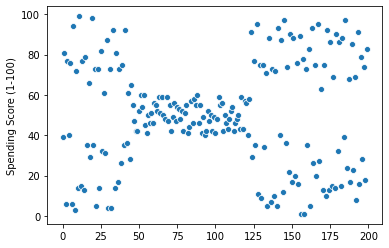

In [252]:
# if it is normally distributed, and welle shuffled
sns.scatterplot(df.index,df['Spending Score (1-100)'])

In [253]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 864x720 with 0 Axes>

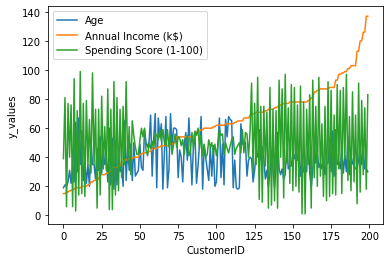

In [254]:
plt.figure(figsize=(12,10))
df.drop('CustomerID',axis=1).plot()
plt.xlabel('CustomerID')
plt.ylabel('y_values')
plt.show()

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [256]:
from sklearn.preprocessing import LabelEncoder

In [257]:
encod=LabelEncoder()

In [258]:
df['Genre']=encod.fit_transform(df.Genre)

In [259]:
df.Genre

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Genre, Length: 200, dtype: int32

In [260]:
df.describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


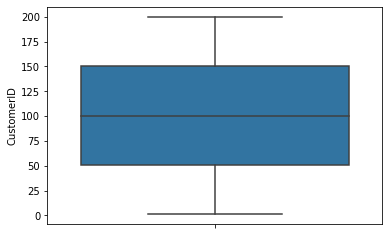

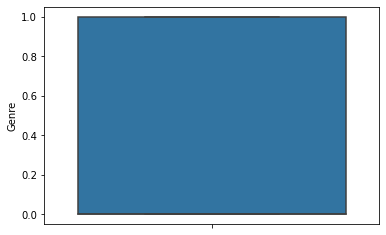

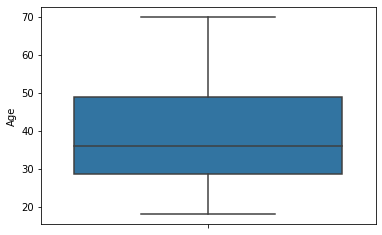

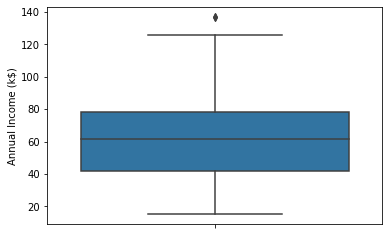

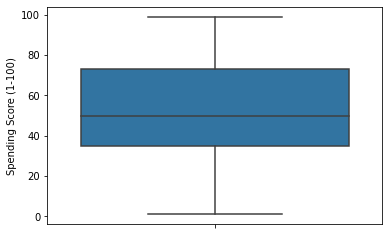

In [261]:
for i in df.columns:
    sns.boxplot(df[i],orient="v")
    plt.show()

## Outliers Detection and Removal (https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)

### method 1: Isolation Forest: Based on Random forest Clussifier
,and it removes the whole row where outliers are found

In [262]:
from sklearn.ensemble import IsolationForest

In [263]:
out_l=IsolationForest() 

In [264]:
out=out_l.fit_predict(df)

In [265]:
out

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,
        1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [266]:
X=out !=-1

In [267]:
len(df[X])

99

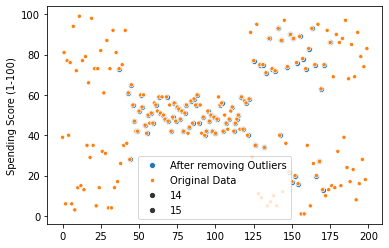

In [268]:
sns.scatterplot(df[X].index,df[X]['Spending Score (1-100)'],label='After removing Outliers')
sns.scatterplot(df.index,df['Spending Score (1-100)'],size=15,label='Original Data')
plt.show()

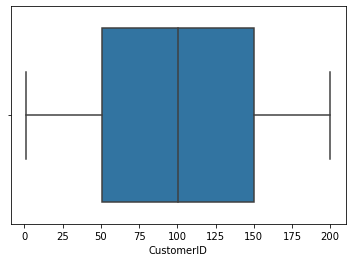

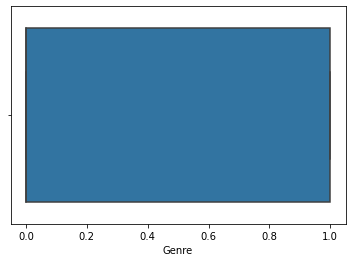

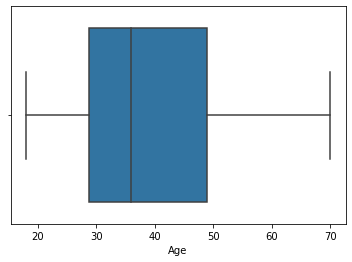

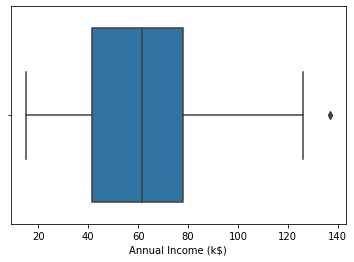

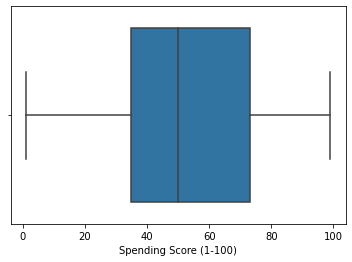

In [269]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

### method 2: Minimum Covariance Determinant
it is a statistical methode and applicable only when we have normal distribution

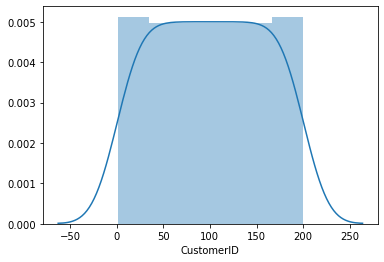

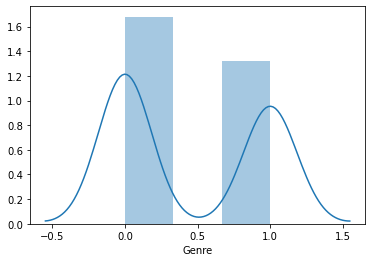

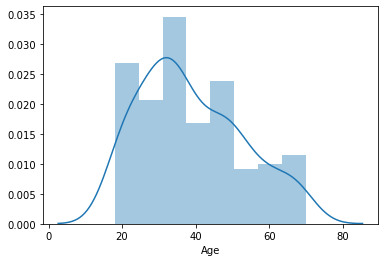

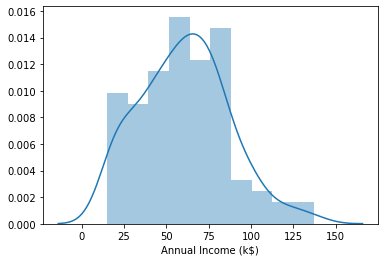

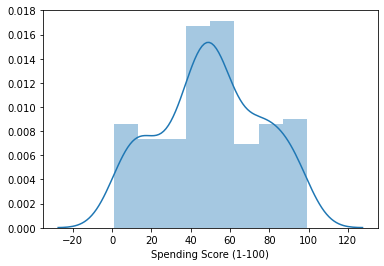

In [270]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [271]:
from sklearn.covariance import EllipticEnvelope

In [272]:
eev=EllipticEnvelope(contamination=0.1) #10% are outliers

In [273]:
out=eev.fit_predict(df)

In [274]:
out

array([-1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [275]:
X=out !=-1

In [276]:
df[X]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
...,...,...,...,...,...
182,183,1,46,98,15
183,184,0,29,98,88
184,185,0,41,99,39
185,186,1,30,99,97


In [277]:
df.reset_index

<bound method DataFrame.reset_index of      CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1      1   19                  15                      39
1             2      1   21                  15                      81
2             3      0   20                  16                       6
3             4      0   23                  16                      77
4             5      0   31                  17                      40
..          ...    ...  ...                 ...                     ...
195         196      0   35                 120                      79
196         197      0   45                 126                      28
197         198      1   32                 126                      74
198         199      1   32                 137                      18
199         200      1   30                 137                      83

[200 rows x 5 columns]>

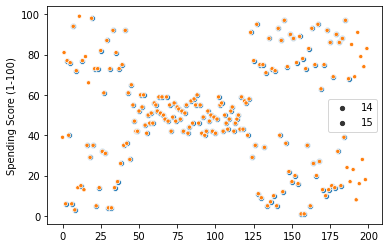

In [278]:
sns.scatterplot(df[X].index,df[X]['Spending Score (1-100)'])
sns.scatterplot(df.index,df['Spending Score (1-100)'],size=15)

### method 3: Local Outlier Factor
Based on nearest neighbors Algorithm
This can work well for feature spaces with low dimensionality (few features), although it can become less reliable as the number of features is increasedµ

In [279]:
from sklearn.neighbors import LocalOutlierFactor

In [280]:
lof=LocalOutlierFactor(contamination=0.1) #as always, this is to be set

In [281]:
out=lof.fit_predict(df)

In [282]:
X=out !=-1

In [283]:
df[X]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,2,1,21,15,81
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
...,...,...,...,...,...
184,185,0,41,99,39
186,187,0,54,101,24
187,188,1,28,101,68
188,189,0,41,103,17


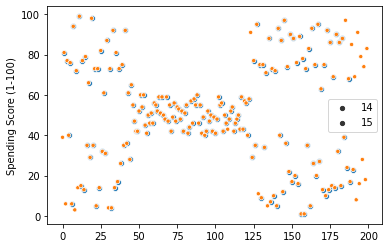

In [284]:
sns.scatterplot(df[X].index,df[X]['Spending Score (1-100)'])
sns.scatterplot(df.index,df['Spending Score (1-100)'],size=15)

### One-Class SVM

In [285]:
from sklearn.svm import OneClassSVM

In [286]:
o_svm=OneClassSVM(nu=0.1)

In [287]:
out=o_svm.fit_predict(df)

In [288]:
X=out !=-1

In [289]:
df[X]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
...,...,...,...,...,...
190,191,0,34,103,23
191,192,0,32,103,69
195,196,0,35,120,79
196,197,0,45,126,28


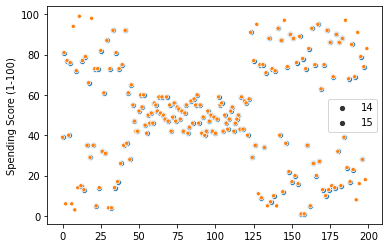

In [290]:
sns.scatterplot(df[X].index,df[X]['Spending Score (1-100)'])
sns.scatterplot(df.index,df['Spending Score (1-100)'],size=15)